# Домашняя работа №1

### Atention!

Пожалуйста, пришлите данную работу в виде архива, где лежит Jupyter Notebook и 3 *.py файла - всю папку с названием homework.

In [1]:
import cv2
import numpy as np
import time

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def PlotImage(image: np.ndarray) -> None:
    """
    Отображает изображение с помощью matplotlib.

    Args:
        image (np.ndarray):  изображение для отображения.
    """

    _, axs = plt.subplots(1, 1, figsize=(8, 7))

    axs.imshow(image)
    axs.axis('off')
    plt.plot()

# Задача №1 - Лабиринт

Реализуйте алгоритм поиска выхода из лабиринта по растровому изобажению.
Вам нужно написать код, который будет находить путь (координаты пикселей) от заданного входа сверху до выхода снизу.

Отрисуйте получившийся маршрут на карте с помощью функции ```PlotMazePath(img, coords)``` или воспользуйтесь вам известным графическим инструментом.

__Input:__

Изображение лабиринта в кодировке $RGB$.

Все карты лежат на [яндекс-диске](https://yadi.sk/d/qEWVZk2picDdZw)

__Ouput:__

Массив координат пути через лабиринт в виде ```(np.array(x), np.array(y))```. 

__Оценка:__

Оценивается __каждое__ успешное решение лабиринта (всего их 4). Решение хотя бы одного лабиринта даёт 40% баллов за задачу, каждый следующий добавляет ещё 20%. Если алгоритм работает порядка 10^-1 секунды, то за решение задачи полагается дополнительно 50%.
Пример решенной задачи.<img src="https://b.radikal.ru/b22/1906/56/df991f2221a7.png" width="300">

In [3]:
from task_1 import FindMazePath

In [4]:
def PlotMazePath(image: np.ndarray,
                 coords: tuple[list[int], list[int]],
                 color: tuple[int, int, int] = (255, 0, 255)
                 ) -> np.ndarray:
    """
    Рисует путь через лабиринт на изображении. 

    Args:
        image (np.ndarray): изображение (матрица цветов) лабиринта.
        coords (tuple[list[int], list[int]]): координаты пути через лабиринт типа (x, y) где x и y - массивы координат точек.
        color (tuple[int, int, int], optional): цвет пути лабиринта на изображении. Defaults to (255, 0, 255).

    Returns:
        np.ndarray: исходное изображение с отрисованными координатами.
    """

    if image.ndim != 3:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    x_coords, y_coords = coords

    for i in range(len(x_coords) - 1):
        start_point = (x_coords[i], y_coords[i])
        end_point = (x_coords[i+1], y_coords[i+1])

        cv2.line(image, start_point, end_point, color, 1)

    return image


Теперь ваша задача реализовать функцию ```FindWayFromMaze``` в ```task_1.py``` для того, чтобы найти координаты пути через лабиринт.

Algorithm operation time (s): 0.0348299
Algorithm operation time (s): 0.0165837
Algorithm operation time (s): 0.0344868
Algorithm operation time (s): 0.0491862
Algorithm operation time (s): 0.0457759


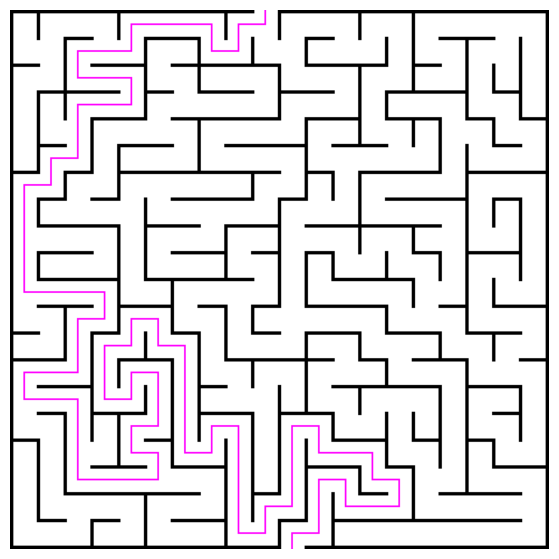

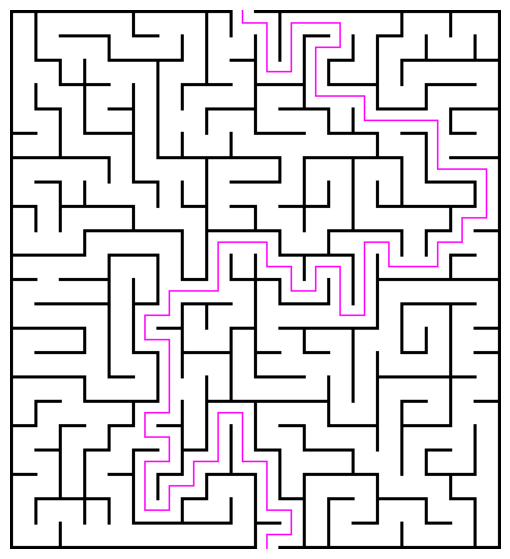

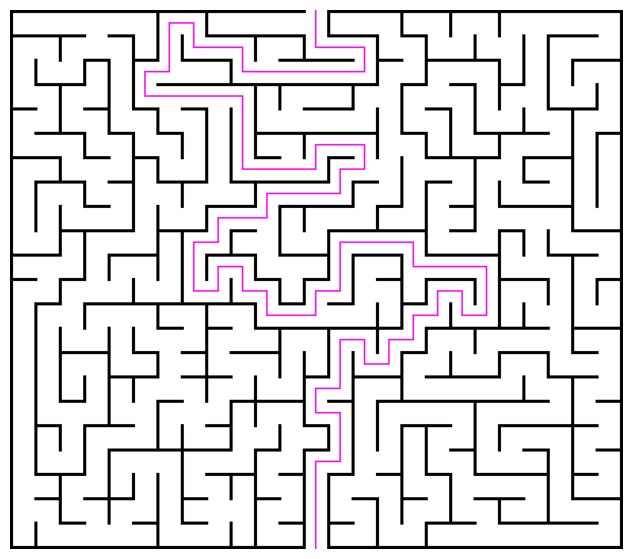

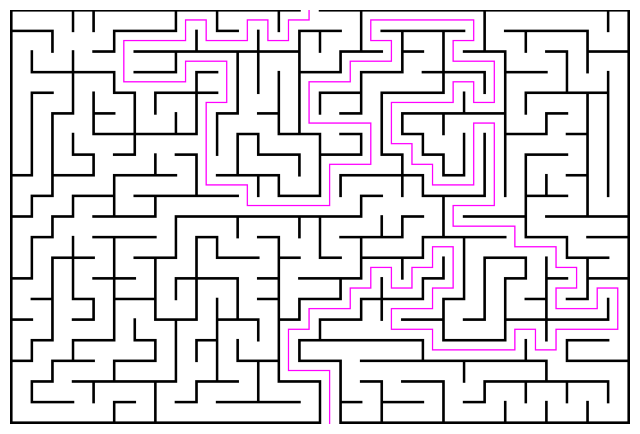

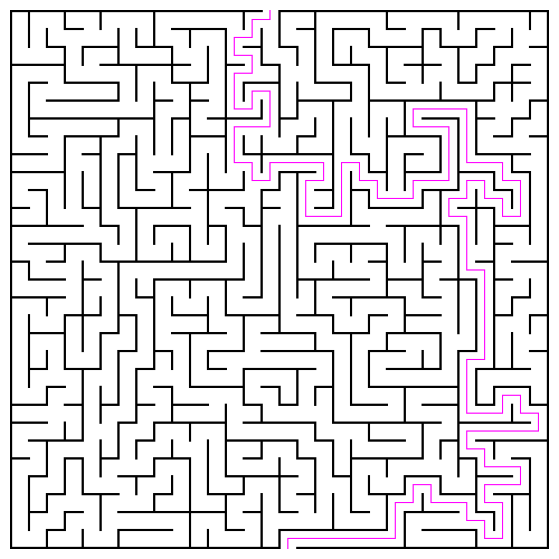

In [5]:
images = [cv2.imread('task_1/20 by 20 orthogonal maze.png'),
          cv2.imread('task_1/20 by 22 orthogonal maze.png'),
          cv2.imread('task_1/25 by 22 orthogonal maze.png'),
          cv2.imread('task_1/30 by 20 orthogonal maze.png'),
          cv2.imread('task_1/30 by 30 orthogonal maze.png')]

for image in images:
    t_0 = time.time()
    way_coords = FindMazePath(image)  # вычислить координаты пути через лабиринт

    # from task_1 import FloodFillFromPoint
    # test_image = FloodFillFromPoint(test_image, (0, 0), (0, 255, 0))

    print(f"Algorithm operation time (s): {np.round(time.time() - t_0, 7)}")

    image_with_way = PlotMazePath(image, way_coords)

    PlotImage(image_with_way)


# Задача №2 - Пробки в городе

Требуется написать программу, которая на вход принимает картинку, на которой схематически изображена машинка на дороге с $N$ полосами и препятствия на полосах. Соответствующие объекты обозначены цветами, которые сохраняются на всех изображениях. 

Результатом работы программы является номер полосы, на которую нужно перестроиться или сообщение о том, что перестраиваться не нужно.

__Оценка:__

За успешное решение хотя бы одного изображение даётся 50% от общего числа баллов и по 25% за каждое следующее.

**Примечание: номер дороги считается слева направо, отсчет начинается с нуля.**

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/8z84sJG/image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/Z6m4XFz/image_01.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [6]:
from task_2 import FindRoadIndex

You need to change to road number: '1'
Algorithm operation time(s): 0.007005
You need to change to road number: '3'
Algorithm operation time(s): 0.0049875
You need to change to road number: '0'
Algorithm operation time(s): 0.0


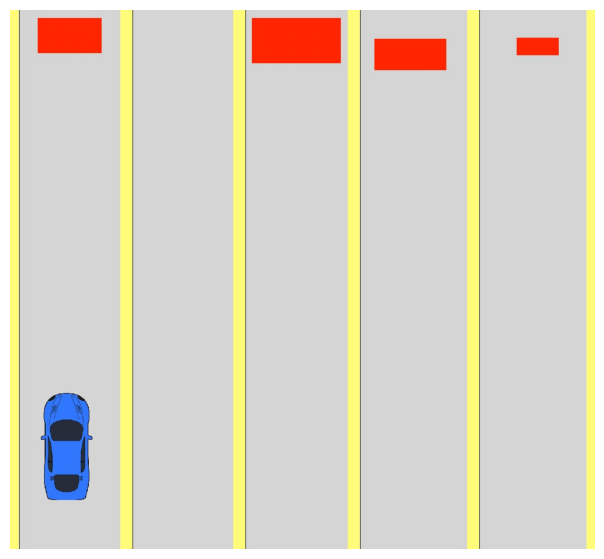

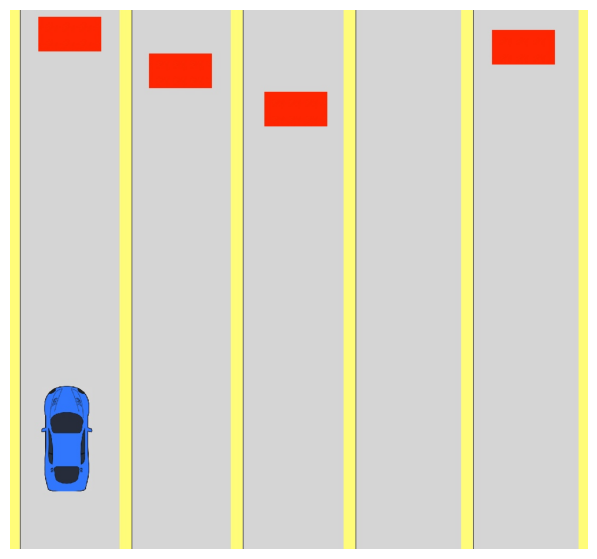

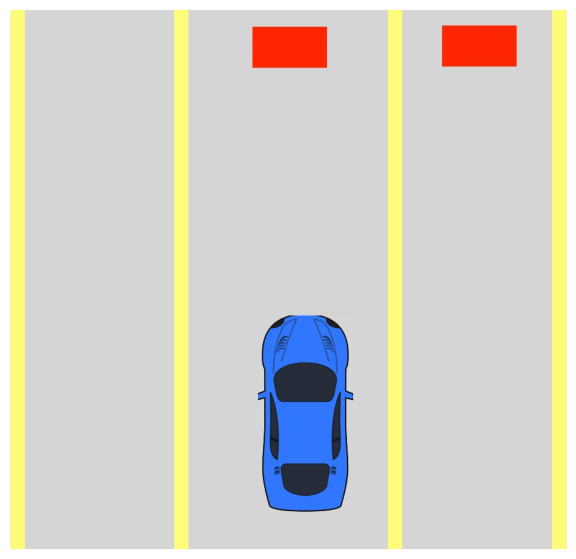

In [7]:
images = [cv2.imread('task_2/image_00.jpg'),
          cv2.imread('task_2/image_01.jpg'),
          cv2.imread('task_2/image_02.jpg')]

for image in images:
    t_0 = time.time()

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    road_number = FindRoadIndex(image)

    print(f"You need to change to road number: '{road_number}'")
    print(f"Algorithm operation time(s): {np.round(time.time() - t_0, 7)}")

    PlotImage(image)


# Задача №3 - Аффинные преобразования

## Задача №3.1 - Поверни изображение

Реализуйте функцию, которая поворачивает изображение вокруг заданной точки на заданный угол ($0^\circ-360^\circ$) и преобразует размер изображения, чтобы оно не обрезалось после поворота (ответ совпадает с тем, что показано ниже).

In [8]:
from task_3 import Rotate

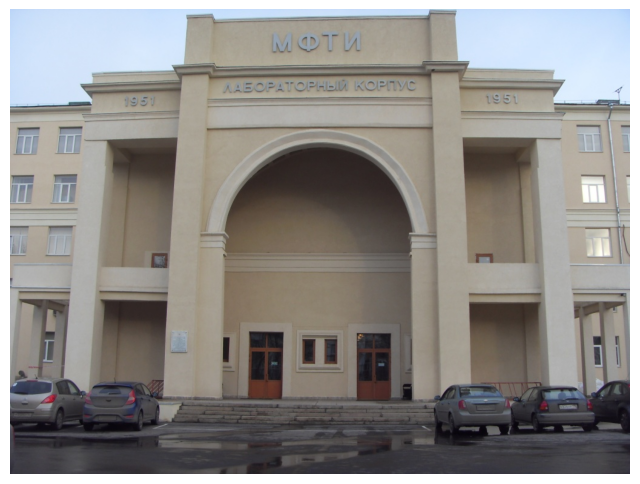

In [9]:
image = cv2.imread('task_3/lk.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
PlotImage(image)

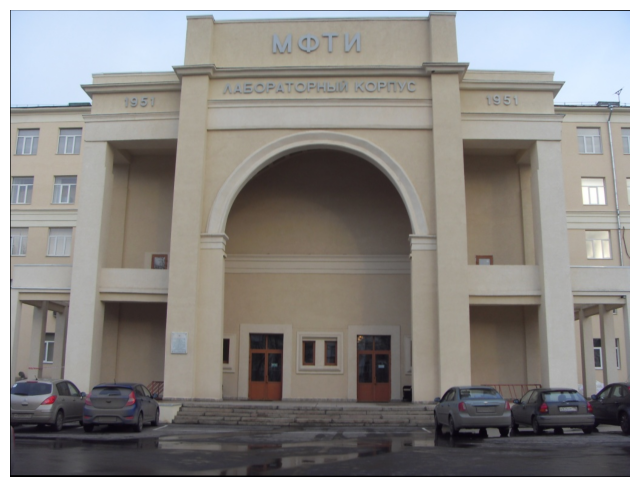

In [10]:
test_point = (200, 200)
test_angle = 360

transformed_image = Rotate(image, test_point, test_angle)
PlotImage(transformed_image)

if test_angle == 15:
    print("How it should be:")
    result_image = cv2.imread('task_3/lk_rotate.jpg')
    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    PlotImage(result_image)

## Задача №3.2 - Афинные преобразования

Реализуйте прототип программы, которая помогает сканировать документы с помощью приложения на телефоне.

<img src="task_3/adobe_scan.jpg"/>

Данная программа берёт изображение, находит углы листа и приводит документ к виду с вертикальной проекцией с помощью афинных преобразований.

В данной задаче предлагается обработать фото тетради, найдя её углы с помощью поиска по цвету.

**Примечание: важно сохранить пропорции тетради.**

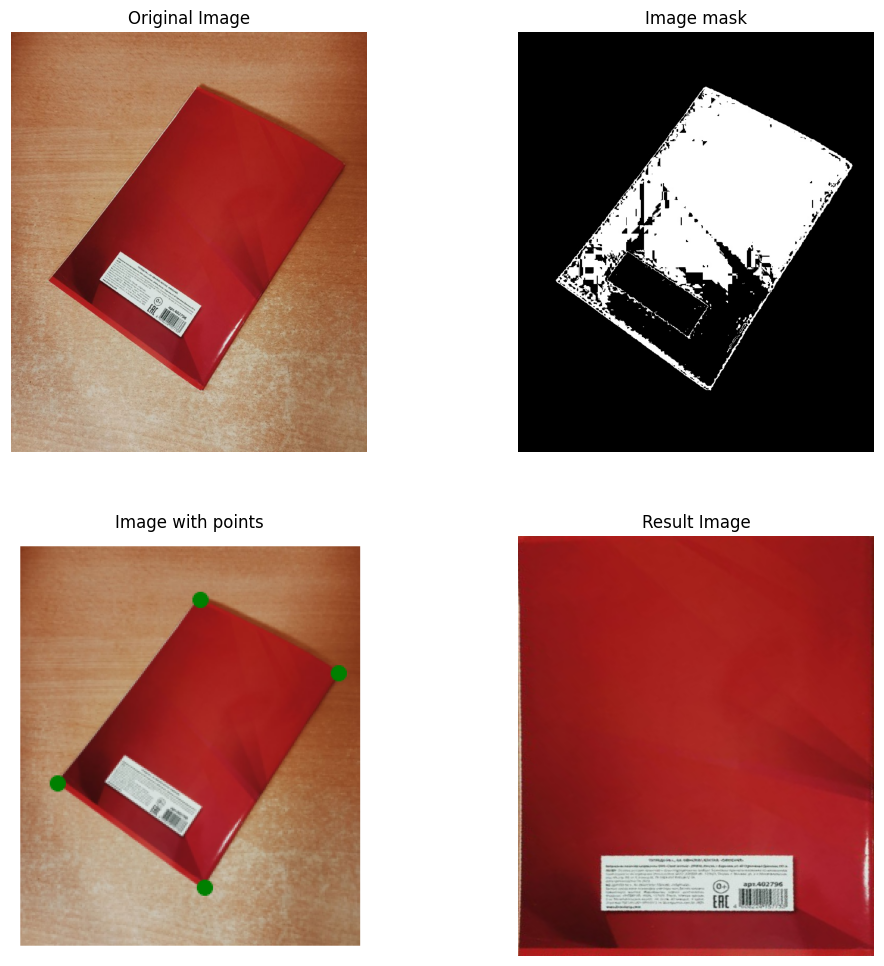

In [ ]:
from task_3 import FindNotebookImage

image = cv2.imread('task_3/notebook.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_mask = cv2.imread('task_3/notebook_mask.jpeg')
image_mask = cv2.cvtColor(image_mask, cv2.COLOR_BGR2RGB)

image_points = cv2.imread('task_3/notebook_points.png')
image_points = cv2.cvtColor(image_points, cv2.COLOR_BGR2RGB)

# image_result = cv2.imread('task_3/notebook_result.png')
# image_result = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)
image_result = FindNotebookImage(image)

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')    

plt.subplot(2, 2, 2)
plt.title("Image mask")
plt.imshow(image_mask, cmap="gray")
plt.axis('off')  

plt.subplot(2, 2, 3)
plt.title("Image with points")
plt.imshow(image_points)
plt.axis('off')  

plt.subplot(2, 2, 4)
plt.title("Result Image")
plt.imshow(image_result)
plt.axis('off')  

plt.show()